In [1]:
# Add matplotlib magic command
%matplotlib inline

# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

In [2]:
# Load files
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read city_data file and store it in a Pandas DF
city_df = pd.read_csv(city_data_to_load)
city_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read the ride_data file and store it in a Pandas DF
ride_df = pd.read_csv(ride_data_to_load)
ride_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
# Get rows that contain NULL values city_df
city_df.isnull()

,city,driver_count,type
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
115,False,False,False
116,False,False,False
117,False,False,False
118,False,False,False


In [6]:
# Get columns and rows that are NOT NULL for city_df
city_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [7]:
# Get the columns and the rows that are not null for city_df.
city_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [8]:
# Get data types for each column for city_df
city_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [9]:
# Get the unique values of the type of city for city_df.
city_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [10]:
# Get the sum of data pts from the 'Urban' cities for city_df
sum(city_df["type"]=="Urban")

66

In [11]:
# Get the sum of data pts from the 'Suburban' cities for city_df
sum(city_df["type"]=="Suburban")

36

In [12]:
# Get the sum of data pts from the 'Rural' cities for city_df
sum(city_df["type"]=="Rural")

18

In [13]:
# Get the columns that are NOT NULL for ride_df
ride_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [14]:
# Get the columns that are NOT NULL for ride_df
ride_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [15]:
# Get the data type for each column in ride_df
ride_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [16]:
# Merge the city_df and ride_df into a single dataset, pyber_df
pyber_df = pd.merge(ride_df, city_df, how="left", on=["city", "city"])
pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [20]:
# Create DFs for each type of city

suburban_df = pyber_df[pyber_df["type"] == "Suburban"]
urban_df = pyber_df[pyber_df["type"] == "Urban"]
rural_df = pyber_df[pyber_df["type"] == "Rural"]


In [18]:
# Get the number of rides for urban cities.
urban_ride_count = urban_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()


city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [19]:
# Get the number of rides for suburban cities.
suburban_ride_count = suburban_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [21]:
# Get the number of rides for rural cities.
rural_ride_count = rural_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [22]:
# Get avg fare for each city in the urban cities df
urban_avg_fare = urban_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [23]:
# Get avg fare for each city in the suburban cities df
suburban_avg_fare = suburban_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [24]:
# Get avg fare for each city in the rural cities df
rural_avg_fare = rural_df.groupby(["city"]).mean()["fare"]
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [25]:
# Get the avg number of drivers for each urban city.
urban_avg_driver = urban_df.groupby(["city"]).mean()["driver_count"]
urban_avg_driver.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [26]:
# Get the avg number of drivers for each suburban city.
suburban_avg_driver = suburban_df.groupby(["city"]).mean()["driver_count"]
suburban_avg_driver.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [27]:
# Get the avg number of drivers for each rural city.
rural_avg_driver = rural_df.groupby(["city"]).mean()["driver_count"]
rural_avg_driver.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

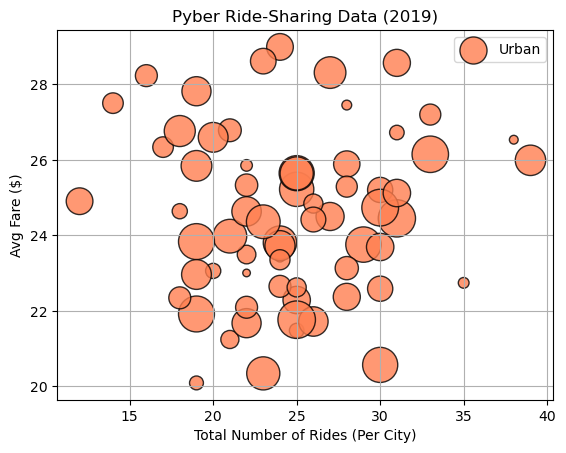

In [28]:
# Create bubble plot for urban cities
plt.scatter(urban_ride_count,
            urban_avg_fare,
           s=10*urban_avg_driver, c="coral",
            edgecolor="black", linewidths=1,
           alpha=0.8, label="Urban")
# Add Title, axes label, and a grid
plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Avg Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add a legend
plt.legend()

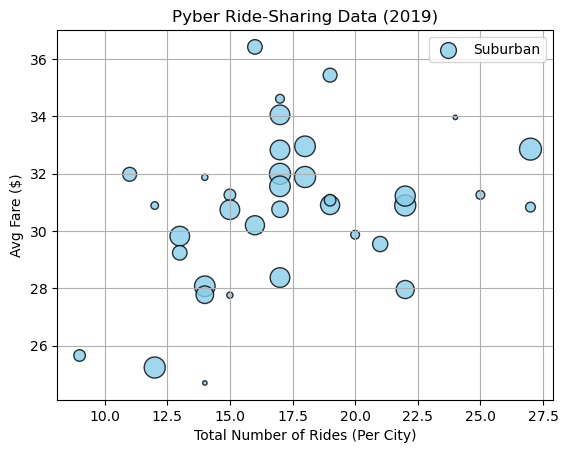

In [29]:
# Create bubble chart for suburban cities.
plt.scatter(suburban_ride_count,
            suburban_avg_fare,
           s=10*suburban_avg_driver, color="skyblue",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Suburban")
# Add Title, axes label, and a grid
plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Avg Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add a legend
plt.legend()


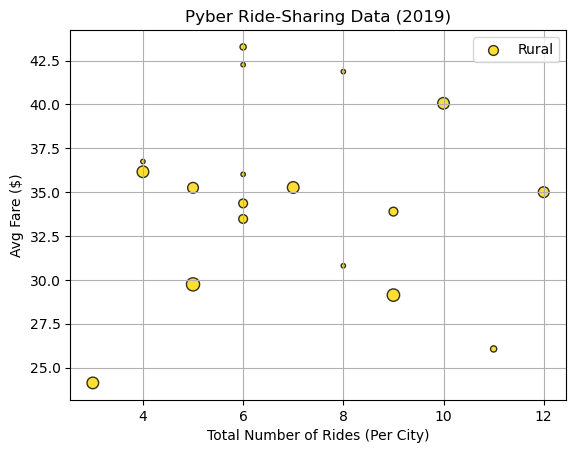

In [30]:
# Create bubble chart for rural cities
plt.scatter(rural_ride_count,
            rural_avg_fare, 
           s=10*rural_avg_driver,
           c="gold", edgecolor="black",
           linewidths=1, alpha=0.8, label="Rural")
# Add Title, axes label, and a grid
plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Avg Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add a legend
plt.legend()



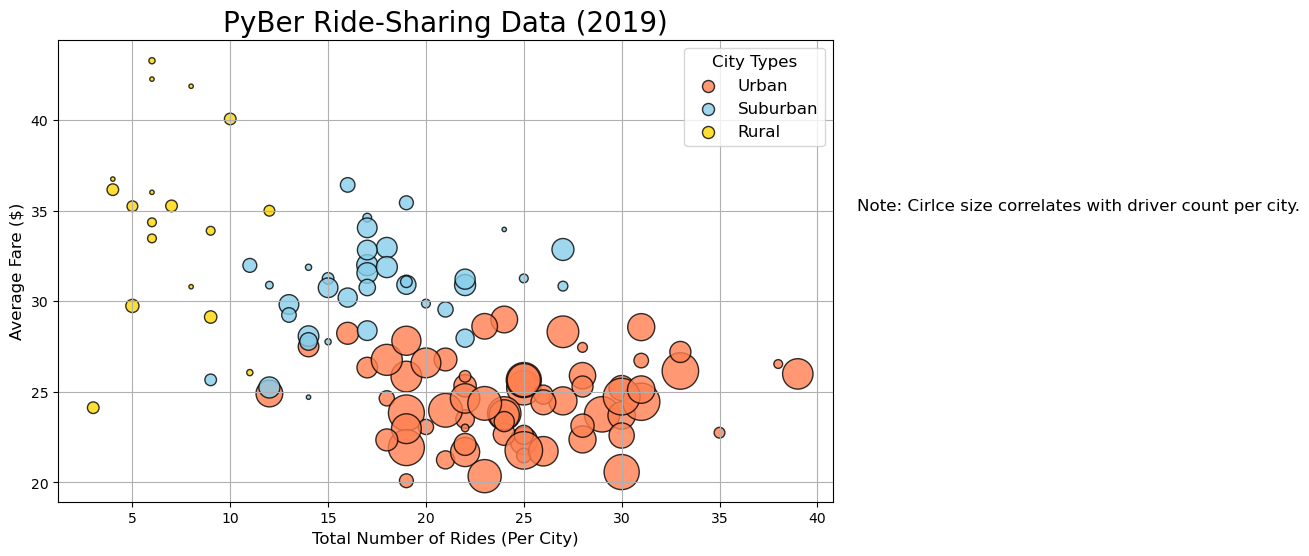

In [31]:
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count,
            urban_avg_fare,
           s=10*urban_avg_driver, c="coral",
            edgecolor="black", linewidths=1,
           alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
            suburban_avg_fare,
           s=10*suburban_avg_driver, color="skyblue",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
            rural_avg_fare, 
           s=10*rural_avg_driver,
           c="gold", edgecolor="black",
           linewidths=1, alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Cirlce size correlates with driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("analysis/Fig1.png")

plt.show()



In [32]:
# Get summary stats for urban_df
urban_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [33]:
# Get summary stats for suburban_df
suburban_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [34]:
# Get summary stats for rural_df
rural_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [35]:
# calculate the summary statistics of the ride count for each city type
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [36]:
# calculate the summary statistics of the ride count for each city type
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [37]:
# calculate the summary statistics of the ride count for each city type
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [38]:
# Calculate the mean number of the rides for each city type.
round(urban_ride_count.mean(), 2), round(suburban_ride_count.mean(), 2), round(rural_ride_count.mean(), 2)

(24.62, 17.36, 6.94)

In [39]:
# calculate the median number of rides for each city type
round(urban_ride_count.median(), 2), round(suburban_ride_count.median(), 2), round(rural_ride_count.median(), 2)

(24.0, 17.0, 6.0)

In [40]:
# Calculate the mode of the ride count for the urban cities.
urban_ride_count.mode()

0    22
1    25
Name: ride_id, dtype: int64

In [41]:
# Calculate the measures of central tendency for the ride count in urban cities
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count:}.")

mode_urban_ride_count = sts.mode(urban_ride_count, keepdims=None)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count:}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


C:\Users\kylef\AppData\Local\Temp\ipykernel_217196\3040775455.py:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_urban_ride_count = sts.mode(urban_ride_count, keepdims=None)


In [42]:
# Get the fares for the urban cities
urban_fare = urban_df["fare"]
urban_fare.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [43]:
# Calculate the the mean, median and mode for urban_fare series
mean_urban_fare = np.mean(urban_fare)

median_urban_fare = np.median(urban_fare)

mode_urban_fare = sts.mode(urban_fare)

print(f"mean_urban_fare:{mean_urban_fare:.2f}")
print(f"median_urban_fare:{median_urban_fare:}")
print(f"mode_urban_fare:{mode_urban_fare:}")




mean_urban_fare:24.53
median_urban_fare:24.64
mode_urban_fare:ModeResult(mode=array([22.86]), count=array([5]))


C:\Users\kylef\AppData\Local\Temp\ipykernel_217196\3425749511.py:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_urban_fare = sts.mode(urban_fare)


In [44]:
suburban_fare = suburban_df["fare"]
suburban_fare.head()

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [45]:
mean_suburban_fare = np.mean(suburban_fare)
mean_suburban_fare

30.97012800000002

In [46]:
rural_fare = rural_df["fare"]
rural_fare.head()

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

In [47]:
mean_rural_fare = np.mean(rural_fare)
mean_rural_fare

34.623440000000016

In [48]:
# Get the driver count data from urban cities
urban_drivers = urban_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [49]:
# Get the mean driver count data from urban cities
mean_urban_driver = np.mean(urban_drivers)
mean_urban_driver

36.67815384615385

In [50]:
# Get the median driver count data from urban cities
median_urban_driver = np.median(urban_drivers)
median_urban_driver

37.0

In [51]:
# Get the mode driver count data from urba cities
mode_urban_driver = sts.mode(urban_drivers,keepdims=True)
mode_urban_driver

ModeResult(mode=array([39], dtype=int64), count=array([86]))

In [52]:
# Get the driver count data from suburban cities
suburban_driver = suburban_df["driver_count"]
suburban_driver.head()

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

In [53]:
mean_suburban_driver = np.mean(suburban_driver)
mean_suburban_driver

13.712

In [54]:
median_suburban_driver = np.median(suburban_driver)
median_suburban_driver

16.0

In [55]:
mode_suburban_driver = sts.mode(suburban_driver,keepdims=True)
mode_suburban_driver

ModeResult(mode=array([20], dtype=int64), count=array([79]))

In [56]:
rural_driver = rural_df["driver_count"]
rural_driver.head()

2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [57]:
mean_rural_driver = np.mean(rural_driver)
mean_rural_driver

4.296

In [58]:
median_rural_driver = np.median(rural_driver)
median_rural_driver

4.0

In [59]:
mode_rural_driver = sts.mode(rural_driver, keepdims=True)
mode_rural_driver

ModeResult(mode=array([1], dtype=int64), count=array([32]))

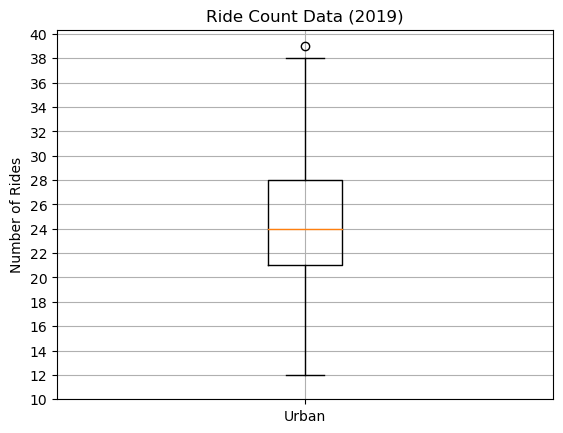

In [60]:
# Create a box-and-whisker plot for the urban cities ride count
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_ylabel('Number of Rides')
ax.set_title('Ride Count Data (2019)')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()


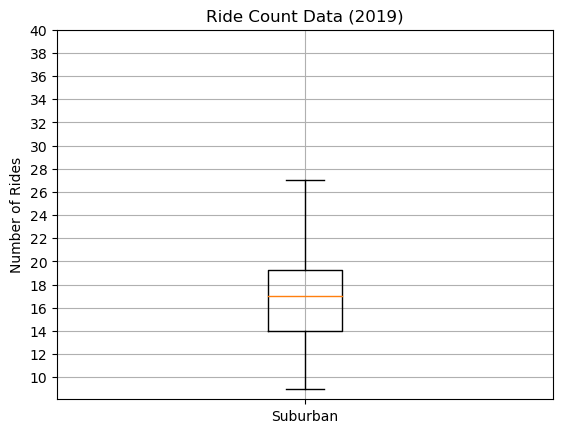

In [61]:
# Create a box-and-whisker plot for the suburban cities ride count
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_ylabel('Number of Rides')
ax.set_title('Ride Count Data (2019)')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()


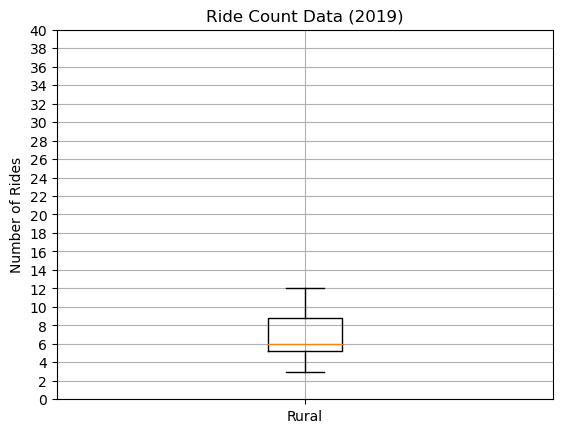

In [62]:
# Create a box-and-whisker plot for the rural cities ride count
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_ylabel('Number of Rides')
ax.set_title('Ride Count Data (2019)')
ax.set_yticks(np.arange(0, 41, step=2.0))
ax.grid()
plt.show()

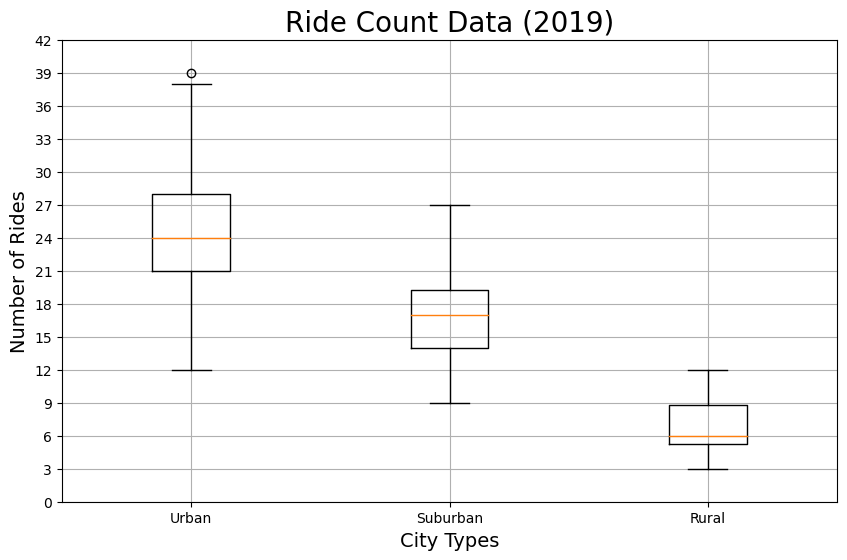

In [63]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels=["Urban", "Suburban", "Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('Ride Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Rides', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()

# Save the figure
plt.savefig("analysis/Fig2.png")
plt.show()

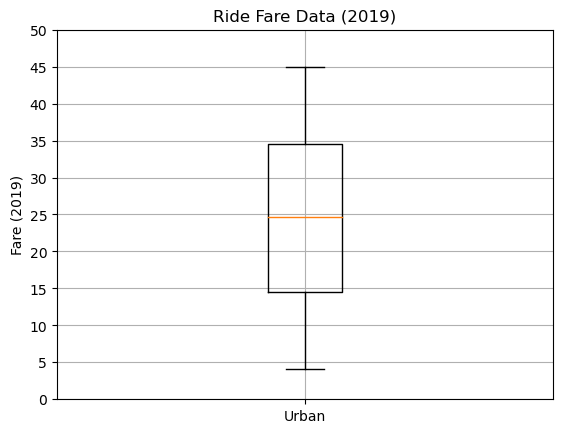

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [64]:
# Box and Whisker plots for urban_fare data
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fare, labels=x_labels)
# Add the title, y-axis label and grid
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare (2019)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fare.describe()

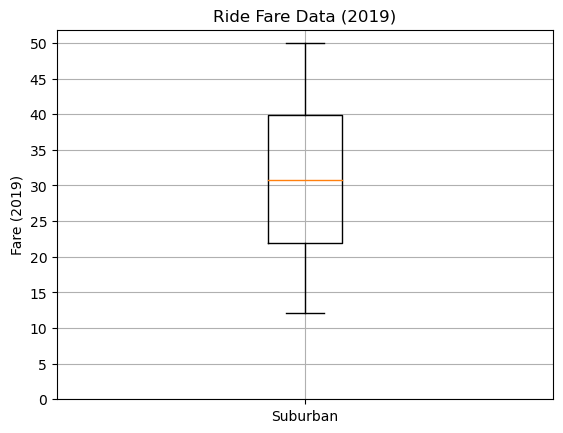

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [65]:
# Box and Whisker plots for suburban_fare data
x_labels = ["Suburban"]
flt, ax = plt.subplots()
ax.boxplot(suburban_fare, labels=x_labels)

# Add the title, y-axis label and grid
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare (2019)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fare.describe()

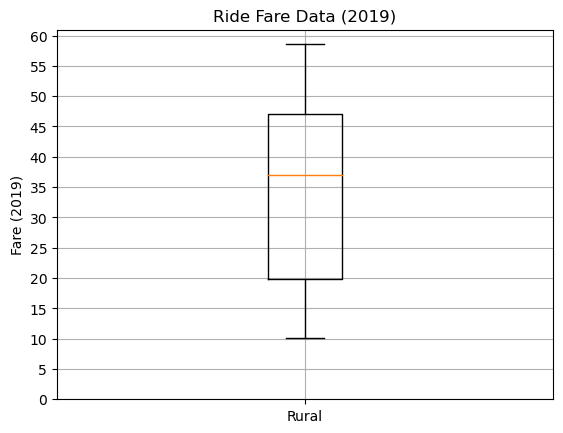

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [73]:
# Box and Whisker plots for rural_fare data
x_labels = ["Rural"]
flt, ax = plt.subplots()
ax.boxplot(rural_fare, labels=x_labels)

# Add the title, y-axis label and grid
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare (2019)')
ax.set_yticks(np.arange(0, 61, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fare.describe()


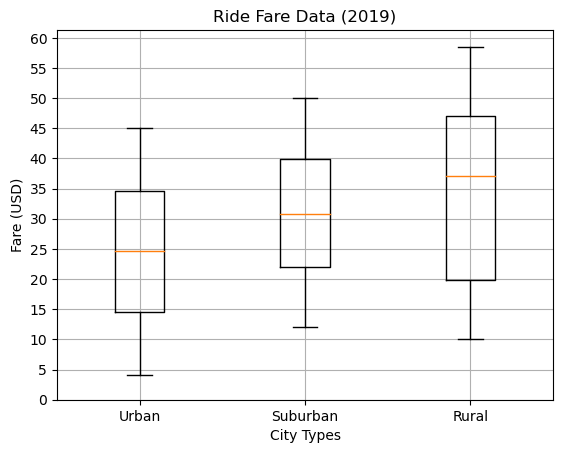

In [90]:
# Create a box-and-whisker plot with ride_fare data for all 3 city types
x_labels=["Urban", "Suburban", "Rural"]
ride_fare_data = [urban_fare, suburban_fare, rural_fare]
fig, ax = plt.subplots()
ax.boxplot(ride_fare_data, labels=x_labels)

# Add the title, y-axis label, and grid
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare (USD)')
ax.set_xlabel('City Types')
ax.set_yticks(np.arange(0, 61, step=5))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig3.png")
plt.show()



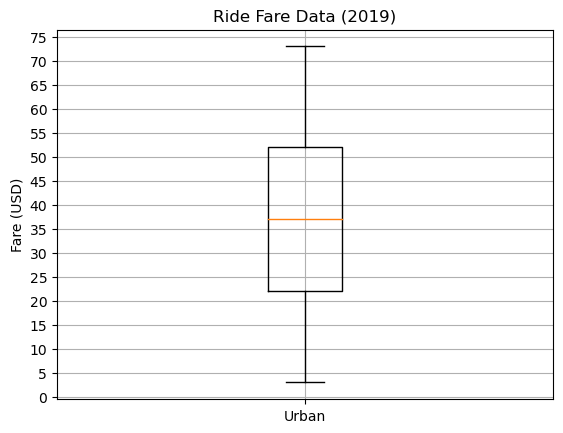

In [78]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers, labels=x_labels)

# Add the title, y-axis label, and grid
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare (USD)')
ax.set_yticks(np.arange(0,76, step=5))
ax.grid()

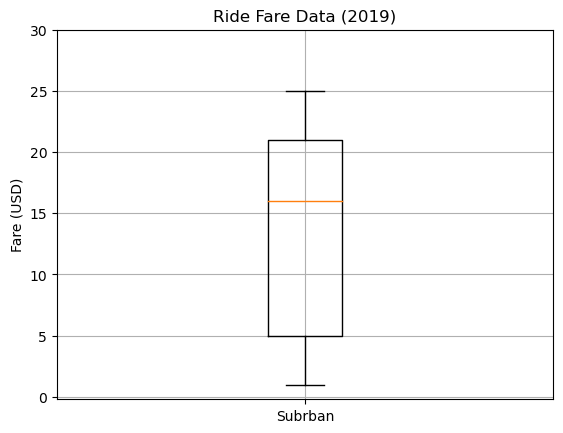

In [81]:
# Create the box-and-whisker plot for the suburban driver count data.
x_labels = ["Subrban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_driver, labels=x_labels)

# Add the title, y-axis label, and grid
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare (USD)')
ax.set_yticks(np.arange(0,31, step=5))
ax.grid()

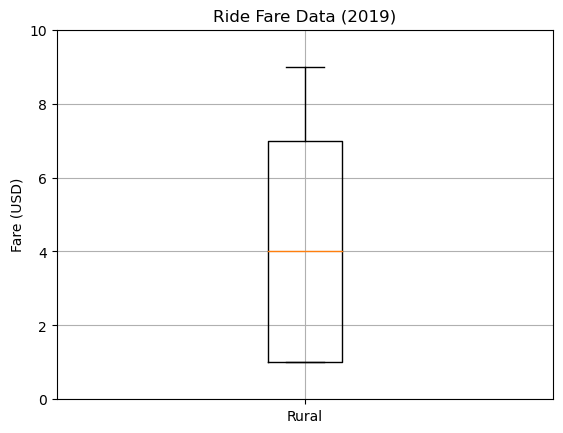

In [85]:
# Create the box-and-whisker plot for the rural driver count data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_driver, labels=x_labels)

# Add the title, y-axis label, and grid
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare (USD)')
ax.set_yticks(np.arange(0,11, step=2))
ax.grid()

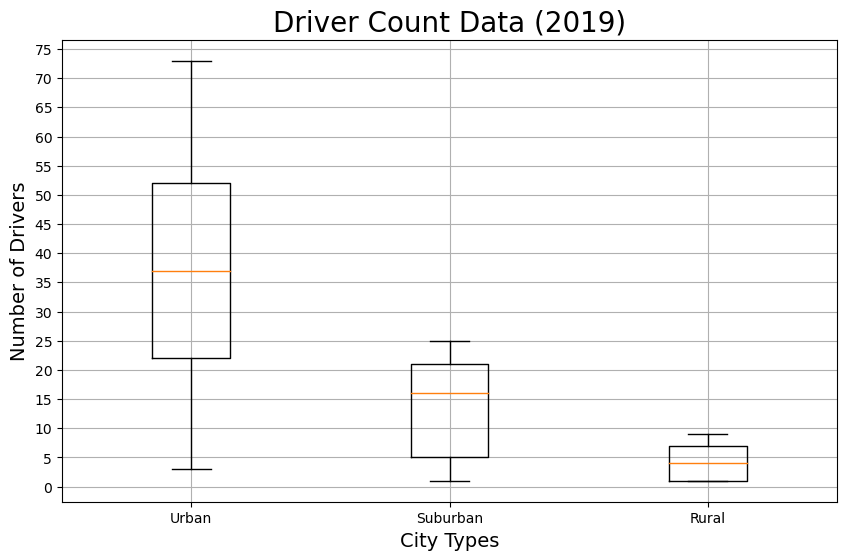

In [89]:
# Add all driver count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_drivers, suburban_driver, rural_driver]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 76, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig4.png")
plt.show()

In [100]:
# To calculate the percentage of the total fares for each city type based on the total fares, we will:
# 1.  Use the groupby() function on the pyber_data_df DataFrame and group by the type of city column so the type of city 
# is the index.
# 2.  Apply the sum() method on the fare column to get the Series with the total number of fares for each city type.
sum_fares_by_type = pyber_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type.head()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [97]:
# Next, we'll get the total fares by using the sum() method on the fare column of the pyber_data_df DataFrame.
total_fares = pyber_df["fare"].sum()
total_fares

63538.64

In [101]:
# Next, we can calculate the percentage of total fares for each city type by dividing the sum_fares_by_type Series 
# by the total_fares Series and multiplying by 100,
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [102]:
type_percents = 100 * pyber_df.groupby(["type"]).sum()["fare"] / pyber_df["fare"].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

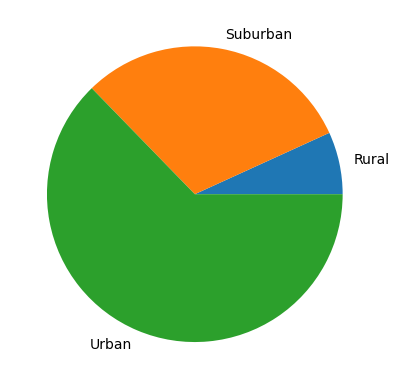

In [103]:
# Build the percentage of fares by city type pie chart.
plt.pie(type_percents, labels=["Rural", "Suburban", "Urban"])
plt.show()

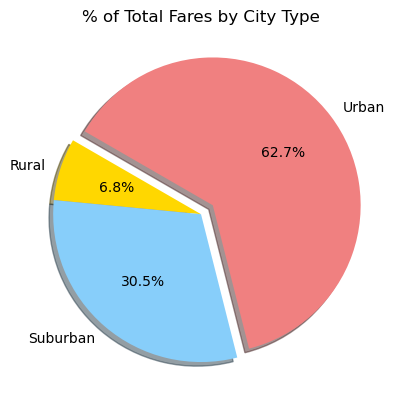

In [104]:
# Build the percentage of fares by city type pie chart.
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Show Figure
plt.show()

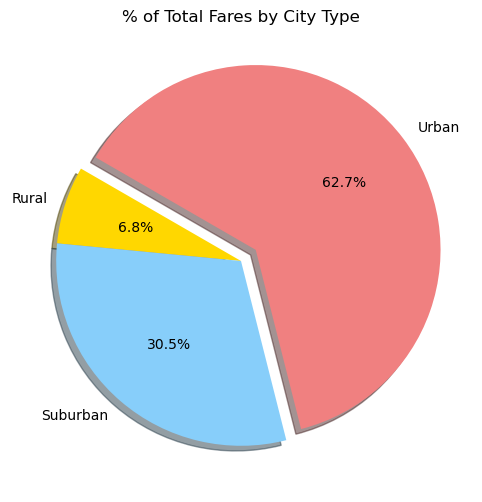

In [105]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig5.png")
# Show Figure
plt.show()

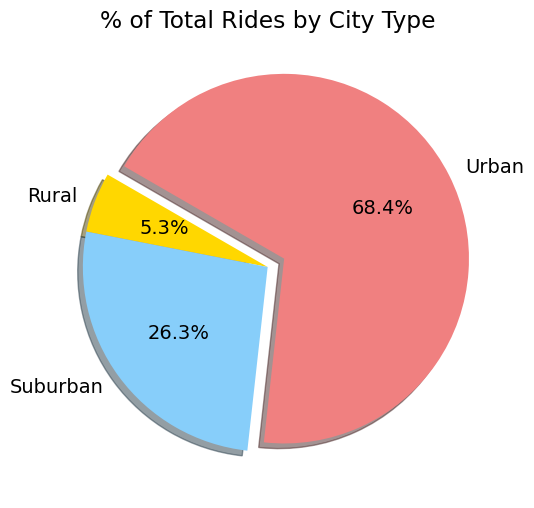

In [108]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(100 * pyber_df.groupby(["type"]).count()["ride_id"] / pyber_df["ride_id"].count(), 
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig6.png")
# Show Figure
plt.show()

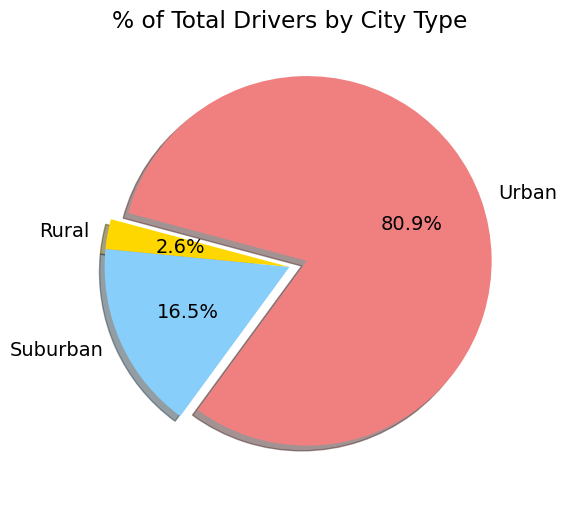

In [114]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(100 * city_df.groupby(["type"]).sum()["driver_count"] / city_df["driver_count"].sum(), labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig7.png")
# Show Figure
plt.show()